<a href="https://colab.research.google.com/github/srilamaiti/SM_MIDS_W207_HW/blob/main/01_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

In [1]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data as matrices
Data usually comes in the form of matrices. The Python Numpy library makes it easy to manipulate matrices efficiently. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [2]:
# Print these to make sure you understand what is being generated.
A = np.array([1, 2, 3])
B = np.arange(1, 13).reshape(3, 4)
C = np.ones((2, 3))
D = np.eye(3)

In [3]:
A

array([1, 2, 3])

In [4]:
A.shape

(3,)

In [5]:
B

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [6]:
B.shape

(3, 4)

In [7]:
C

array([[1., 1., 1.],
       [1., 1., 1.]])

In [8]:
C.shape

(2, 3)

In [9]:
D

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
D.shape

(3, 3)

---
### Exercise 1: Matrix manipulation (8 points)

Perform the following computations using numpy functions and print the results. Note that the `*` operator implies matrix multiplication -- make sure the dimensions align!
1. 2A + 1
2. Sum the rows of B
3. Sum the columns of B
4. Number of elements of B greater than 5
5. C + C
6. A * B
7. (B * B) - D

In [11]:
# YOUR CODE HERE
print("2A + 1\n", 2*A + 1)
# axis = 1 performs row wise operations, and 0 performs column wise operations
print("Sum the rows of B\n", np.sum(B, axis = 1)) 
print("Sum the columns of B\n", np.sum(B, axis = 0))
print("Number of elements of B greater than 5\n", np.count_nonzero(B > 5))
print("C + C\n", C + C)
print("A * B\n", np.dot(A, B))
#print("(B * B) - D\n", np.multiply(B,B) - D)
# The reason of transposinmg is that, we can not do the matrix multiplication.
print("(B * B) - D\n", np.dot(B, np.transpose(B)) - D)

2A + 1
 [3 5 7]
Sum the rows of B
 [10 26 42]
Sum the columns of B
 [15 18 21 24]
Number of elements of B greater than 5
 7
C + C
 [[2. 2. 2.]
 [2. 2. 2.]]
A * B
 [38 44 50 56]
(B * B) - D
 [[ 29.  70. 110.]
 [ 70. 173. 278.]
 [110. 278. 445.]]


---

## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [12]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

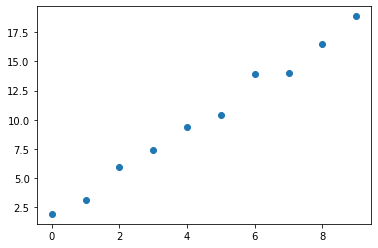

In [13]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data()
plt.scatter(X, Y)
plt.show()

In [14]:
len(X), len(Y)

(10, 10)

In [15]:
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
Y

array([ 1.93405968,  3.0944645 ,  5.94536872,  7.42963199,  9.39545765,
       10.43217899, 13.95254891, 14.01246051, 16.50596472, 18.86958306])

---
### Exercise 2: Models for Data (8 points)

A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = x+5$ 
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines.

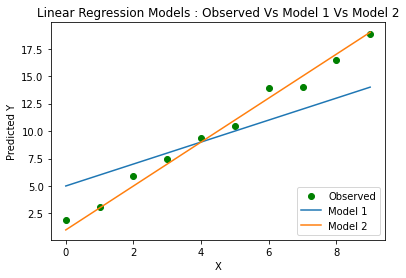

In [17]:
# YOUR CODE HERE
# Create some artificial data using create_1d_data.
#X, M1 = create_1d_data(w = 1, b = 5)
#X, M2 = create_1d_data(w = 2, b = 1)

M1 = X + 5
M2 = 2*X + 1
plt.scatter(X, Y, color = 'g', label = "Observed")
plt.plot(X, M1, label = "Model 1")
plt.plot(X, M2, label = "Model 2")
plt.xlabel("X")
plt.ylabel("Predicted Y")
plt.title("Linear Regression Models : Observed Vs Model 1 Vs Model 2")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [2, 0, 1]

#add legend to plot
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc = "lower right") 
#plt.legend(loc = "lower right")
plt.show()

---

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Exercise 3: Computing MSE (8 points)

Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$.

In [18]:
def MSE(true_values, predicted_values):
    """Return the MSE between true_values and predicted values."""
    # YOUR CODE HERE
    return np.sum((true_values - predicted_values) * (true_values - predicted_values)) / len(true_values)

In [19]:
np.set_printoptions(suppress=True, precision=10)
print('MSE for M1:', MSE(Y, M1))
print('MSE for M2:', MSE(Y, M2))

MSE for M1: 6.839502909434264
MSE for M2: 0.45821672338761366


---

## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

MSE for M3: 0.10941956925529832


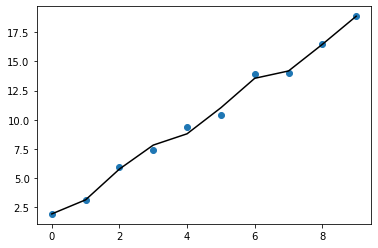

In [20]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)
M3 = polynomial_model(X)
fig = plt.scatter(X, Y)
plt.plot(X, M3, '-k')
print ('MSE for M3:', MSE(Y, M3))

MSE for M_deg(1): 0.2765544631


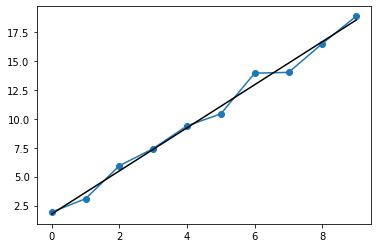

MSE for M_deg(2): 0.2762746022


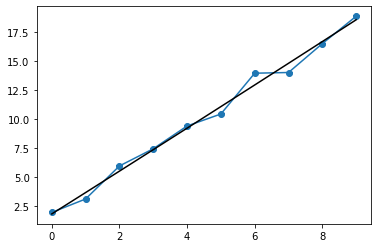

MSE for M_deg(3): 0.2680702858


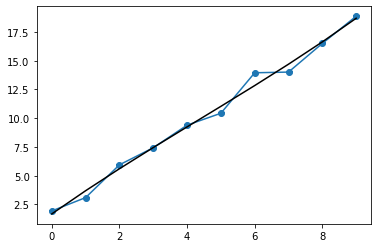

MSE for M_deg(4): 0.246187353


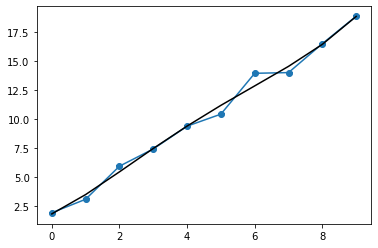

MSE for M_deg(5): 0.2461858477


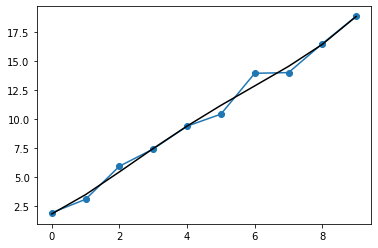

MSE for M_deg(6): 0.207123588


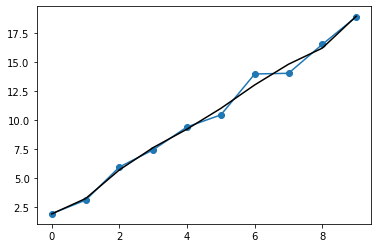

MSE for M_deg(7): 0.1608620179


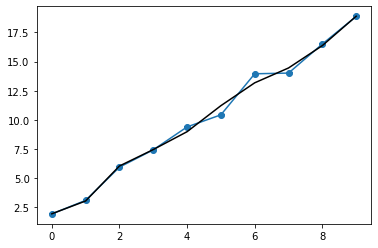

MSE for M_deg(8): 0.1094195693


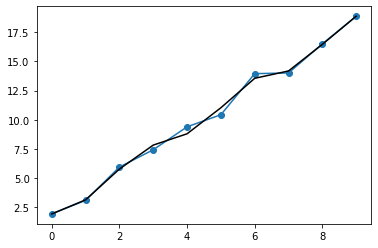

MSE for M_deg(9): 0.0


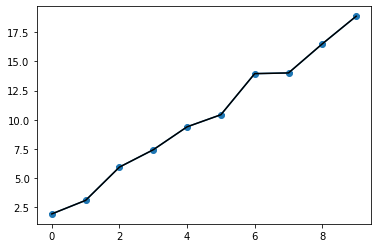

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


MSE for M_deg(10): 0.0


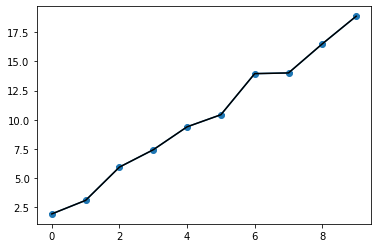

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


MSE for M_deg(11): 0.0


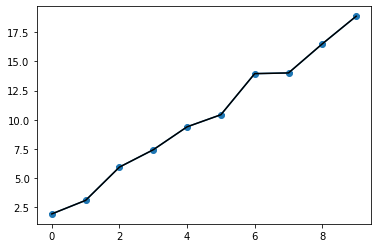

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


MSE for M_deg(12): 0.0


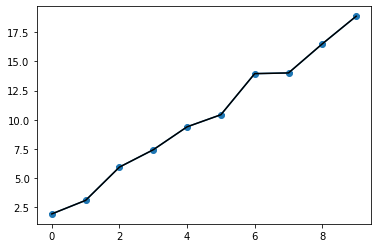

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


MSE for M_deg(13): 0.0


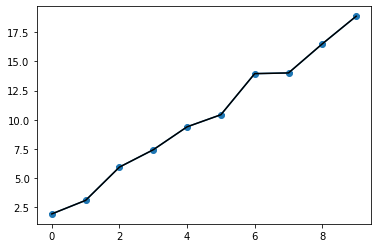

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


MSE for M_deg(14): 0.0


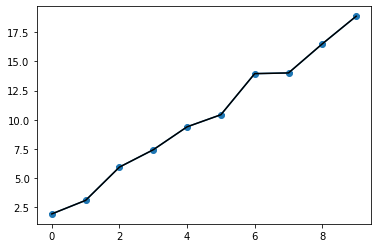

In [21]:
np.set_printoptions(suppress=True, precision=10)

for deg in range(1,15):
    polynomial_model_coefficients = np.polyfit(X, Y, deg=deg)
    polynomial_model = np.poly1d(polynomial_model_coefficients)
    M_deg = polynomial_model(X)
    fig = plt.scatter(X, Y)
    plt.plot(X, Y, '-*')
    plt.plot(X, M_deg, '-k')
    print (f'MSE for M_deg({deg}):', np.round(MSE(Y, M_deg), 10))
    plt.show(block = False)

---
### Exercise 4: Generalization (8 points)

Explain whether you expect $M_3$ to be better than $M_2$ at predicting the labels for new unseen inputs.

*Writen answer:*

# Though Mean Square Error(MSE) matric for M3 is less than MSE of M2 (MSE M3 = 0.1094 vs MSE M2 = 0.45821672338761366), I do not think M3 prediction(a polynomial regression) generalizes well with unseen data over M2's(linear regression) predictions. I have done an experiment with polynomial degree and noticed that with each degree increase, MSE drops and the predicted line passes well covering all X values, which is overfitting and lack of generalization.

---

## Review

* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.